### I use Matplotlib for reading and displaying images as it is convenient to display inside this Jupyter notebook.

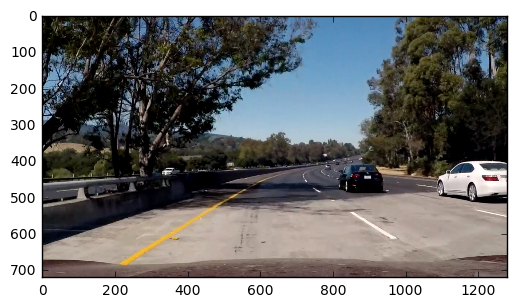

In [1]:
# Load and display image using matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

image = mpimg.imread('images/test.jpg')
plt.imshow(image)

In [2]:
# Load and display image using opencv
# Image displays in a separate window. Press any key to dismiss the window
import cv2

image = cv2.imread('images/test.jpg')
cv2.imshow( "Display window", image )
cv2.waitKey(0)
cv2.destroyAllWindows()

### I also prefer Matplotlib as it keeps images in a single colorspace and no conversion is required.

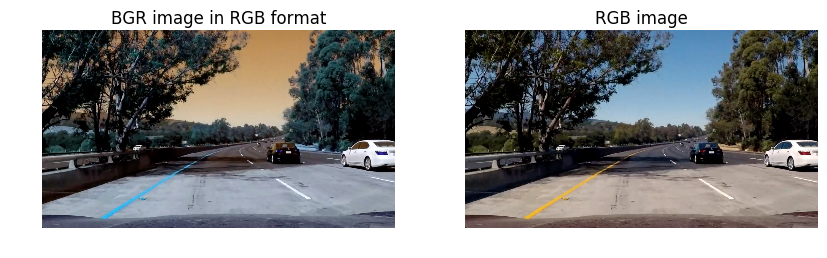

In [3]:
# Load image with opencv and display with matplotlib
# OpenCV reads in BGR format so convert to RGB format to plot with Matplotlib
imageBGR = cv2.imread('images/test.jpg')
# Conversion from BGR to RGB format to display correctly with matplotlib
imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB) 

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(imageBGR)
ax1.axis('off')
ax1.set_title("BGR image in RGB format")
ax2.imshow(imageRGB)
ax2.axis('off')
ax2.set_title("RGB image")

### For grayscale images it is ok to read in OpenCV and display in Matplotlib as there is only one color channel.

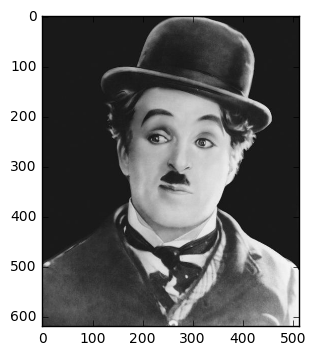

In [4]:
# Grayscale image processing does not require conversion
image = cv2.imread('images/charlie_grayscale.jpg')
plt.imshow(image)

### Use grayscale rather than color images in edge detection as it is faster and color does not add any additional information for edge detection.

0.015 Seconds to detect edges in color images
0.004 Seconds to detect edges in grayscale images
Gray edge detection is faster than color edge detection by 3.75


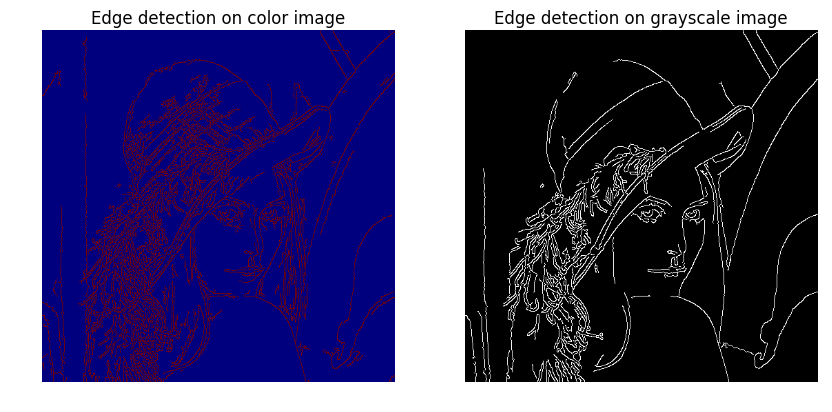

In [5]:
import time
# Edge detection using grayscale vs color images
image = mpimg.imread('images/lena_color.jpg')
t1=time.time()
color_edges = cv2.Canny(image, 50, 150)
t2 = time.time()
color_time = round(t2-t1, 4)
print(color_time, 'Seconds to detect edges in color images')
    
# Apply grayscale and Gaussian smoothing
t1=time.time()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny filter for edge detection
gray_edges = cv2.Canny(blur_gray, 50, 150)
t2 = time.time()
gray_time = round(t2-t1, 4)
print(gray_time, 'Seconds to detect edges in grayscale images')

print("Gray edge detection is faster than color edge detection by", round(color_time/gray_time, 2))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(color_edges)
ax1.axis('off')
ax1.set_title("Edge detection on color image")
ax2.imshow(gray_edges, cmap = 'gray')
ax2.axis('off')
ax2.set_title("Edge detection on grayscale image")

### I prefer OpenCV to Matplotlib in applications where both PNG and JPEG image formats are used.
### With OpenCV we do not have to worry about scaling between these two formats as it reads PNG and JPEG in the 0 to 255 range.
### Matplotlib reads PNG in 0 to 1 range and JPEG in 0 to 255 range so scaling is necessary.

Read JPEG with OpenCV: First pixel and Last pixel [75 53 47] [123 126 141]
Read PNG with OpenCV: First pixel and Last pixel [135 134 118] [69 82 70]


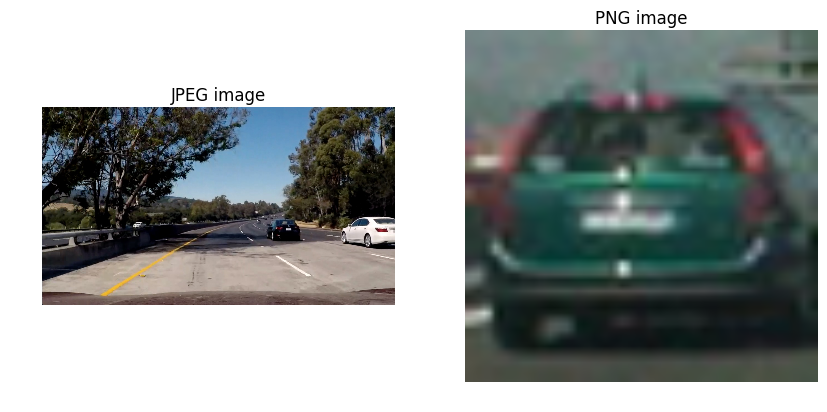

In [6]:
# cv2 reads both jpeg and png in 0 to 255 range
imageJPEG = cv2.imread('images/test.jpg')
imagePNG = cv2.imread('images/green_car.png')

img_shape_jpeg = imageJPEG.shape
img_shape_png = imagePNG.shape
print("Read JPEG with OpenCV: First pixel and Last pixel", imageJPEG[0][0], imageJPEG[img_shape_jpeg[0]-1][img_shape_jpeg[1]-1])
print("Read PNG with OpenCV: First pixel and Last pixel", imagePNG[0][0], imagePNG[img_shape_png[0]-1][img_shape_png[1]-1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(cv2.cvtColor(imageJPEG, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title("JPEG image")
ax2.imshow(cv2.cvtColor(imagePNG, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.set_title("PNG image")

Read JPEG with Matplotlib: First pixel and Last pixel [47 53 75] [141 126 123]
Read PNG with Matplotlib: First pixel and Last pixel [ 0.4627451   0.52549022  0.52941179] [ 0.27450982  0.32156864  0.27058825]


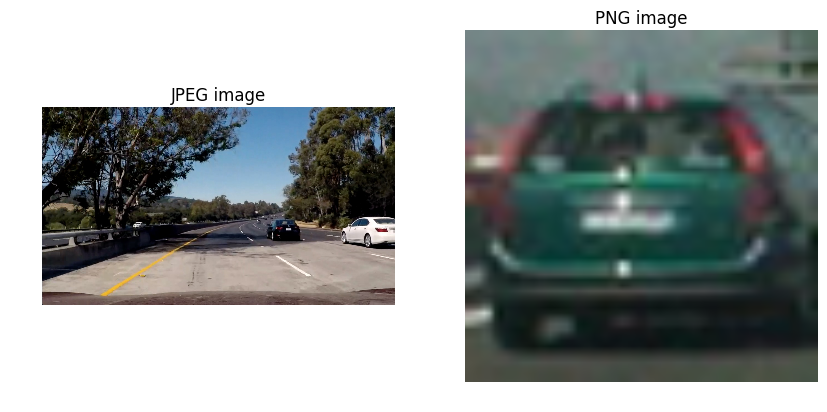

In [7]:
# matplotlib reads jpeg in 0 to 255 and png in 0 to 1 scale!
imageJPEG = mpimg.imread('images/test.jpg')
imagePNG = mpimg.imread('images/green_car.png')

img_shape_jpeg = imageJPEG.shape
img_shape_png = imagePNG.shape
print("Read JPEG with Matplotlib: First pixel and Last pixel", imageJPEG[0][0], imageJPEG[img_shape_jpeg[0]-1][img_shape_jpeg[1]-1])
print("Read PNG with Matplotlib: First pixel and Last pixel", imagePNG[0][0], imagePNG[img_shape_png[0]-1][img_shape_png[1]-1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(imageJPEG)
ax1.axis('off')
ax1.set_title("JPEG image")
ax2.imshow(imagePNG)
ax2.axis('off')
ax2.set_title("PNG image")

### I illustrate with the following example code the effects of no scaling when reading PNG and JPEG formats with Matplotlib. These functions were used in [Project 5 - Vehicle Detection and Tracking](https://github.com/kharikri/SelfDrivingCar-VehicleDetectionAndTracking).
### In Project 5 I trained a support vector machine (SVM) to detect cars. Here I simply import the SVM parameters so we do not have to do the time consuming training. Using these SVM parameters I detect/predict cars in a test image and draw bounding boxes around them. 
### The following code is not important other than realizing the value of scaling which is demonstrated by the results.

In [8]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 1)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    # Array of bounding boxes where cars are detected
    bbox_list = []
    
    if (SCALE == True):
        img = img.astype(np.float32)/255
        
    img_tosearch = img[ystart:ystop,:,:]
    
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb) 

    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))       
            test_prediction = svc.predict(test_features)          
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                bbox_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return bbox_list

In [9]:
import pickle
# Read Support Vector Machine (SVM) parameters trained in Project 5 
with open("svm_parameters.p", "rb") as f:
    svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins = pickle.load(f) 

f.close()
assert orient == 10

### When there is no scaling of images between PNG and JPEG formats

In [10]:
# When there is no scaling of images between PNG and JPEG formats
import nu
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

SCALE = False
# Search for cars in four regions within a new image. No need to search at the top of the image (0 to 336) as there are only 
# buildings, bill boards, and trees
image = mpimg.imread('images/test.jpg')
draw_img = np.copy(image)
bbox_list = []

ystart = 400
ystop = 528
scale = 1.0
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(image, bbox_list[0], color=(0, 0, 255), thick=6)

ystart = 400
ystop = 592
scale = 1.5
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[1], color=(0, 255, 0), thick=6)

ystart = 400
ystop = 656
scale = 2.0
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[2], color=(255, 0, 0), thick=6)

ystart = 336
ystop = 656
scale = 2.5
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[3], color=(255, 255, 0), thick=6)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title("Original image")
ax2.imshow(draw_img)
ax2.axis('off')
ax2.set_title("Bounding boxes")

NameError: name 'np' is not defined

### When there is scaling of images between PNG and JPEG formats

In [ ]:
# When there is scaling of images between PNG and JPEG formats
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

SCALE = True
# Search for cars in four regions within a new image. No need to search at the top of the image (0 to 336) as there are only 
# buildings, bill boards, and trees
image = mpimg.imread('images/test.jpg')
draw_img = np.copy(image)
bbox_list = []

ystart = 400
ystop = 528
scale = 1.0
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(image, bbox_list[0], color=(0, 0, 255), thick=6)

ystart = 400
ystop = 592
scale = 1.5
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[1], color=(0, 255, 0), thick=6)

ystart = 400
ystop = 656
scale = 2.0
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[2], color=(255, 0, 0), thick=6)

ystart = 336
ystop = 656
scale = 2.5
bbox_list.append(find_cars(draw_img, ystart, ystop, scale, svc, X_scaler, orient, 
                           pix_per_cell, cell_per_block, spatial_size, hist_bins))
draw_img = draw_boxes(draw_img, bbox_list[3], color=(255, 255, 0), thick=6)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title("Original image")
ax2.imshow(draw_img)
ax2.axis('off')
ax2.set_title("Bounding boxes")